In [1]:
import keras
from keras.datasets  import mnist 
(x_train,y_train),(x_test,y_test)=mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [2]:
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[0]

## reshaping for the batch as if we add the images its dimension is (x,y,z),with batch img size is -(x,y,z,w) , so we add fourth dimension.
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

print(x_test.shape)

(10000, 28, 28, 1)


In [3]:
input_shape=(img_rows,img_cols,1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /=255
x_test /=255

print(x_test.shape)

(10000, 28, 28, 1)


In [4]:
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [5]:

num_classes=y_test.shape[1]
num_pixels=x_train.shape[1]*x_train.shape[2]

In [6]:
from keras.models import  Sequential
from keras.layers import Dense,Flatten,Conv2D
from keras.layers import MaxPooling2D,Dropout
from keras.optimizers import SGD
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [7]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
checkpoint=ModelCheckpoint("/home/rachit/Desktop/2/2.h5",monitor='val_loss',mode=min,save_best_only=True,verbose=1)
earlystoping=EarlyStopping(monitor='val_loss',patience =1,min_delta=0,verbose=1,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',verbose=0,patience=1,min_delta=0.0001,factor=0.2)

callbacks=[checkpoint,reduce_lr]

In [8]:
batch_size = 32
num_epoch = 20

#model training
history = model.fit(x_train, y_train,
          epochs=num_epoch,
          verbose=1,callbacks=callbacks,
          validation_data=(x_test,y_test))

Epoch 1/20
1870/1875 [============================>.] - ETA: 0s - loss: 0.1893 - accuracy: 0.9425
Epoch 00001: val_loss improved from inf to 0.04889, saving model to /home/rachit/Desktop/2/2.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1890 - accuracy: 0.9426 - val_loss: 0.0489 - val_accuracy: 0.9839
Epoch 2/20
1860/1875 [============================>.] - ETA: 0s - loss: 0.0804 - accuracy: 0.9761
Epoch 00002: val_loss improved from 0.04889 to 0.03561, saving model to /home/rachit/Desktop/2/2.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0801 - accuracy: 0.9762 - val_loss: 0.0356 - val_accuracy: 0.9883
Epoch 3/20
1862/1875 [============================>.] - ETA: 0s - loss: 0.0619 - accuracy: 0.9812
Epoch 00003: val_loss did not improve from 0.03561
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0619 - accuracy: 0.9812 - val_loss: 0.0398 - val_accuracy: 0.9864
Epoch 4/20
1870/1875 [============================>.] - ETA:

In [9]:

print(x_test.shape)

(10000, 28, 28, 1)


In [10]:
print(y_test.shape)

(10000, 10)


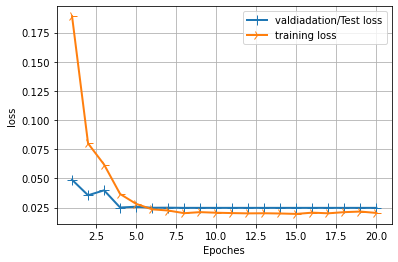

In [11]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='valdiadation/Test loss')
line2=plt.plot(epochs,loss_values,label='training loss')

plt.setp(line1,linewidth=2.0,marker="+",markersize=10.0)
plt.setp(line2,linewidth=2.0,marker="4",markersize=10.0)
plt.xlabel("Epoches")
plt.ylabel("loss")
plt.grid(True)
plt.legend()
plt.show()

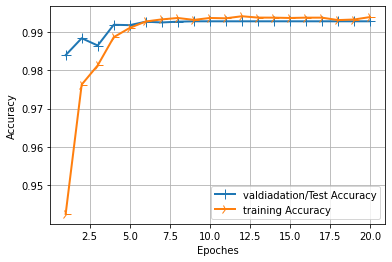

In [12]:
import matplotlib.pyplot as plt
history_dict=history.history

acc_values = history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_acc_values,label='valdiadation/Test Accuracy') 
line2=plt.plot(epochs,acc_values,label='training Accuracy')

plt.setp(line1,linewidth=2.0,marker="+",markersize=10.0)
plt.setp(line2,linewidth=2.0,marker="4",markersize=10.0)
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

y_pred=model.predict_classes(x_test)

print(classification_report(np.argmax(y_test,axis=1),y_pred))
print(confusion_matrix(np.argmax(y_test,axis=1),y_pred))



Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg    

In [14]:
import keras
from keras.datasets  import mnist 
(x_train,y_train),(x_test,y_test)=mnist.load_data()
results=np.absolute(y_test-y_pred)
results_indics=np.nonzero(results>0)
print(results_indics)

(array([ 320,  321,  340,  445,  449,  582,  938,  947, 1014, 1039, 1112,
       1226, 1232, 1247, 1260, 1319, 1393, 1414, 1527, 1530, 1621, 1709,
       1717, 1901, 2035, 2040, 2043, 2109, 2118, 2129, 2130, 2135, 2293,
       2454, 2462, 2597, 2654, 2896, 2921, 2939, 3030, 3073, 3422, 3520,
       3534, 3767, 3780, 3808, 3941, 4176, 4238, 4536, 4571, 4740, 4761,
       4807, 4860, 5888, 5937, 5955, 6576, 6597, 6625, 6651, 9009, 9015,
       9019, 9530, 9664, 9679, 9692, 9729, 9839]),)
